## Data Exploration

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')


# Perform basic summary of the dataset
summary = data.describe(include='all')

# Check for missing values
missing_values = data.isnull().sum()

# Check for duplicates
duplicates = data.duplicated().sum()

# Identifying categorical and numerical features
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
numerical_features = data.select_dtypes(include=['number']).columns.tolist()

# Check for anomalies by identifying columns with extreme values (outliers)
anomalies = data[numerical_features].apply(lambda x: (x < x.quantile(0.01)) | (x > x.quantile(0.99))).sum()

# Display results
summary, missing_values, duplicates, categorical_features, numerical_features, anomalies


(                   id   brand      model     model_year         milage  \
 count   188533.000000  188533     188533  188533.000000  188533.000000   
 unique            NaN      57       1897            NaN            NaN   
 top               NaN    Ford  F-150 XLT            NaN            NaN   
 freq              NaN   23088       2945            NaN            NaN   
 mean     94266.000000     NaN        NaN    2015.829998   65705.295174   
 std      54424.933488     NaN        NaN       5.660967   49798.158076   
 min          0.000000     NaN        NaN    1974.000000     100.000000   
 25%      47133.000000     NaN        NaN    2013.000000   24115.000000   
 50%      94266.000000     NaN        NaN    2017.000000   57785.000000   
 75%     141399.000000     NaN        NaN    2020.000000   95400.000000   
 max     188532.000000     NaN        NaN    2024.000000  405000.000000   
 
        fuel_type                                        engine transmission  \
 count     183450 

In [ ]:
data.head()

In [ ]:
test_data.head()

### Initial Findings

Numerical:
- id: 188,533 total
- model_year ranges 1974-2024 with average model being 2015-2016
- mileage ranges 100-405,000 with average of 65,705.3 miles
- price ranges from $2,000 to $2,954,083 with average of $43,878 

Categorical:
- brand
- model
- fuel_type
- engine
- transmission
- ext_col (exterior color)
- int_col (interior color)
- accident
- clean_title

Missing Values: 
- fuel type: 5,083
- accident: 2,452 
- clean_title: 21,419 

Other:
- no duplicates
- look into potential outliers for: model_year, milage, price

## Data Visualization

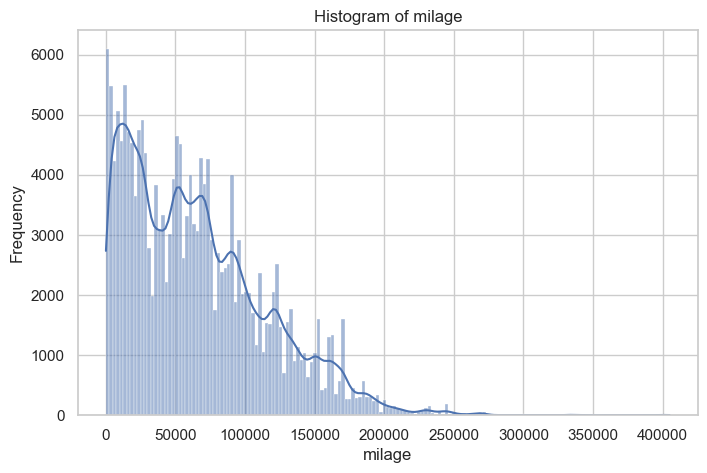

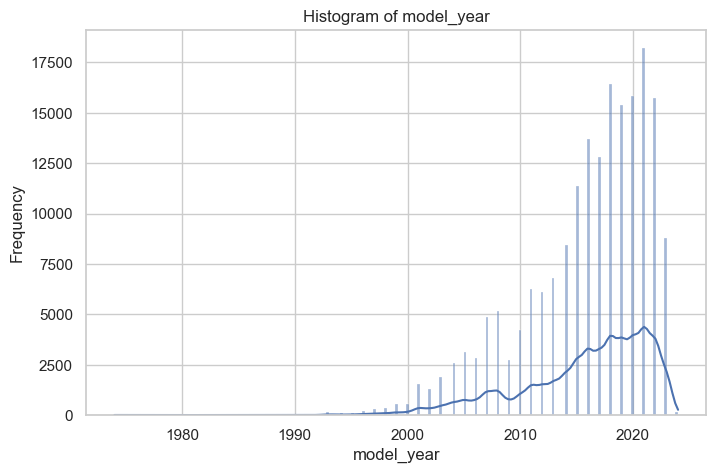

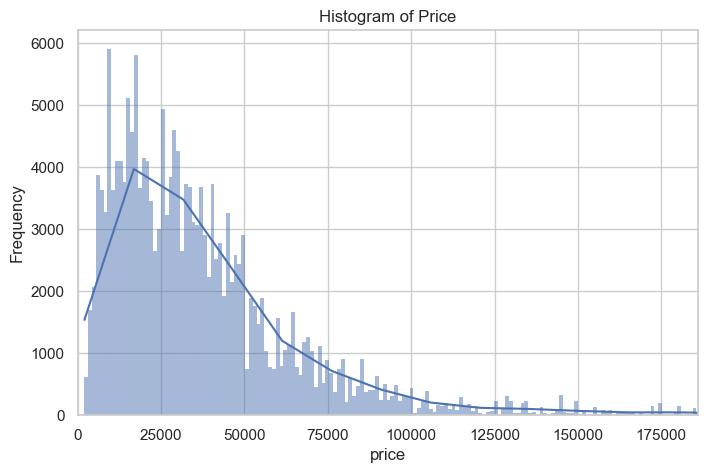

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visual style for seaborn
sns.set(style="whitegrid")

# 1. Univariate analysis: Histograms for continuous variables (including price)
numerical_features = ['milage','model_year']

# Plot individual histograms for continuous variables
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


# plotting price separately to make the distribution more visible
plt.figure(figsize=(8, 5))
sns.histplot(data['price'], kde=True)
plt.xlim(0, data['price'].quantile(0.98))  # Zoom in on 98th percentile of the price range
plt.title('Histogram of Price')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()



- milage: right skewed
- model_year: left skewed
- price: right skewed

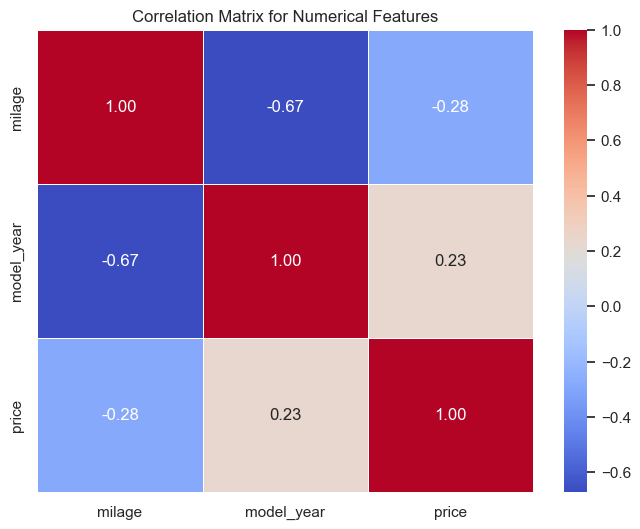

In [3]:
# 2. Correlation matrix for numerical variables
numerical_features = ['milage','model_year', 'price']
correlation_matrix = data[numerical_features].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Numerical Features')
plt.show()

- Model Year vs Milage
    - strong negative correlation suggests newer vehicles have lower milage- intuitive
- Milage vs Price
    - moderate negative correlation suggests cars with higher mileage are associated with lower prices as expected
- Model Year vs Price
    - weak to moderate correlation suggests newer vehicles tend to have higher price. Not a strong relationship because price is influenced by many other factors.

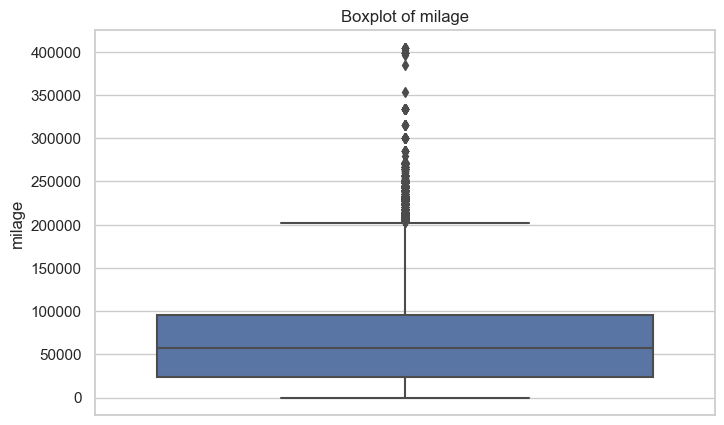

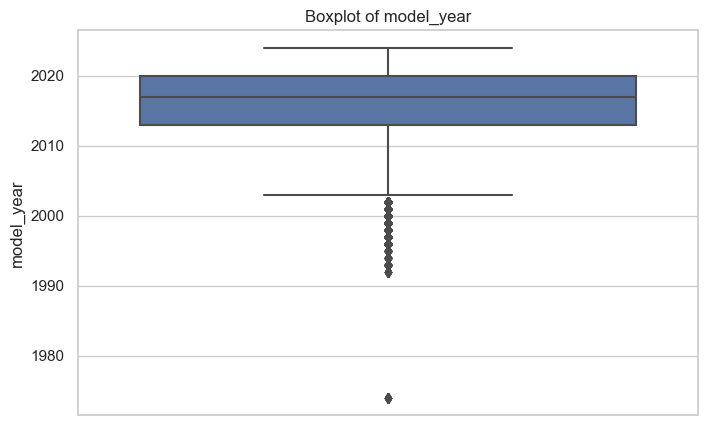

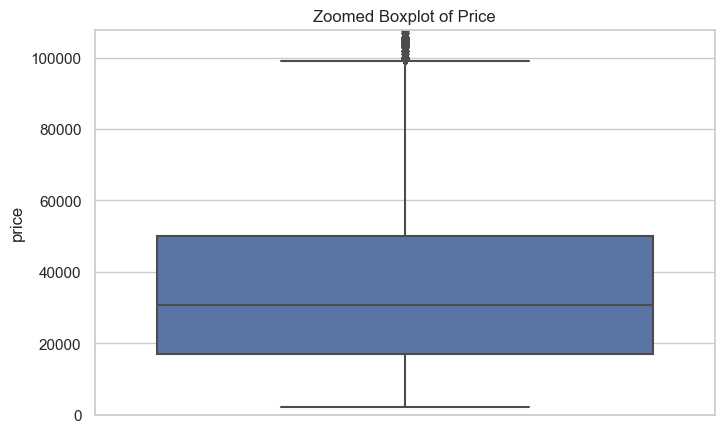

In [83]:
# 3. Visualizing outliers with box plots for continuous variables

# Visualizing outliers with vertical box plots for continuous variables
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=data[feature])  # Changing to vertical orientation
    plt.title(f'Boxplot of {feature}')
    plt.ylabel(feature)
    plt.show()

# price is separated to zoom in on the 95th percentile
plt.figure(figsize=(8, 5))
sns.boxplot(y=data['price'])
plt.ylim(0, data['price'].quantile(0.95))  # Zoom in to the 95th percentile of price to remove extreme outliers
plt.title('Zoomed Boxplot of Price')
plt.ylabel('price')
plt.show()


- model_year:
    - narrow interquartile range indicates that the middle 50% if vehicles are concentrated within a small range of years ~2010-2020
    - number of older vehicles appear to be outliers extending from the early 2000s to the 1970s
    - oldest car sold in 1973ish
    
- mileage:
    - IQR lies between approximately 20,000 to 100,000 miles, which suggests that most vehicles in this dataset have mileage within this range.
    - considerable number of high-mileage outliers, with some vehicles having up to 400,000 miles.

- price:
    - IQR shows that the middle 50% of vehicle prices fall between approximately $18,000 and $50,000
    - outliers are vehicles more expensive than $100k
    - most expensive cars sold for around $3 million, some for $2 and $1.6 million and then a decent spread of outliers sold from $100k to $750k

In [ ]:
# Visualizing the distribution of categorical variables using bar plots

# brands
plt.figure(figsize=(10, 6))
data['brand'].value_counts().nlargest(25).plot(kind='bar', color='skyblue')
plt.title(f'Categories of brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

# models
plt.figure(figsize=(10, 6))
data['model'].value_counts().nlargest(35).plot(kind='bar', color='skyblue')
plt.title(f'Categories of model')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# fuel type
plt.figure(figsize=(10, 6))
fuel_type_counts = data['fuel_type'].value_counts(normalize=True) * 100  # Get percentages
ax = fuel_type_counts.plot(kind='bar', color='skyblue')

# Annotating percentages on top of the bars
for i, percentage in enumerate(fuel_type_counts):
    ax.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', va='bottom')

plt.title('Categories of fuel_type with Percentages')
plt.ylabel('Frequency (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

# engine
plt.figure(figsize=(10, 6))
data['engine'].value_counts().nlargest(20).plot(kind='bar', color='skyblue')
plt.title(f'Categories of engine')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

# transmission
plt.figure(figsize=(10, 6))
data['transmission'].value_counts().nlargest(20).plot(kind='bar', color='skyblue')
plt.title(f'Categories of transmission')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# exterior and interior colors
colors = ['ext_col', 'int_col']

for feature in colors:
    plt.figure(figsize=(10, 6))
    data[feature].value_counts().nlargest(10).plot(kind='bar', color='skyblue')
    plt.title(f'Top 10 Categories of {feature}')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [ ]:
# accident
plt.figure(figsize=(10, 6))
data['accident'].value_counts().nlargest(20).plot(kind='bar', color='skyblue')
plt.title(f'Categories of accident')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

# clean title
plt.figure(figsize=(10, 6))
data['clean_title'].value_counts().nlargest(5).plot(kind='bar', color='skyblue')
plt.title(f'Categories of clean_title')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

### Key Observations

- Brand: 
    - The distribution shows that certain brands dominate the dataset, with Ford being the most frequent.
- Model: 
    - Among models, the Ford F-150 XLT stands out as the most frequent, followed by a variety of other models.
- Fuel Type: 
    - Gasoline is by far the most common fuel type, with other fuel types much less frequent.
- Engine: 
    - Certain engine configurations appear more frequently, though there is a wide variety overall.
- Transmission: 
    - The A/T transmission (Automatic) is dominant, with very few alternatives.
- Exterior Color: 
    - Black is the most common exterior color, followed by a few other popular colors like White and Silver.
- Interior Color: 
    - Black also leads among interior colors, with a large gap to the next most common colors.
- Accident: 
    - Most vehicles have "None reported" for accidents, indicating clean histories for the majority.
- Clean title:
    - all records are either clean title or missing

## Data Preprocessing

In [37]:
preprocessed_data = data.copy()

#### Dropping Unnecessary Features

In [38]:
# dropping id
preprocessed_data = preprocessed_data.drop(columns=['id'])

#### Handling Missing Values

In [39]:
# Handling missing values for 'accident' 
preprocessed_data['accident'].fillna('None reported', inplace=True)

# Impute missing values in clean_title with 'Unknown'
preprocessed_data['clean_title'].fillna('Unknown', inplace=True)

# For 'fuel_type', given that 90%+ of the values are 'Gasoline', we'll fill the missing values with 'Gasoline'
# This simplifies the process without likely affecting model accuracy significantly
preprocessed_data['fuel_type'].fillna('Unknown', inplace=True)

# Confirm the missing values have been handled
missing_values_after_fill = preprocessed_data.isnull().sum()

missing_values_after_fill


brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [6]:
preprocessed_data.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


#### Encoding Categorical Variables

In [40]:
train_df = preprocessed_data.copy()
test_df = test_data.copy()

In [41]:
train_df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [42]:
test_df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


In [43]:
# Taking Care of Missing Test Vars First

# Handling missing values for 'accident' 
test_df['accident'].fillna('None reported', inplace=True)

# Impute missing values in clean_title with 'Unknown'
test_df['clean_title'].fillna('Unknown', inplace=True)

# For 'fuel_type', given that 90%+ of the values are 'Gasoline', we'll fill the missing values with 'Gasoline'
# This simplifies the process without likely affecting model accuracy significantly
test_df['fuel_type'].fillna('Unknown', inplace=True)

# Confirm the missing values have been handled
missing_values_after_fill = test_df.isnull().sum()

missing_values_after_fill


id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
dtype: int64

In [44]:
from sklearn.preprocessing import OneHotEncoder

# Define the categorical features
categorical_features_to_encode = ['brand', 'fuel_type', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']

# Initialize the encoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit the encoder on the training data
encoder.fit(train_df[categorical_features_to_encode])

# Transform both datasets
train_encoded = encoder.transform(train_df[categorical_features_to_encode])
test_encoded = encoder.transform(test_df[categorical_features_to_encode])

# Get the encoded feature names
encoded_feature_names = encoder.get_feature_names_out(categorical_features_to_encode)

# Create DataFrames
train_encoded_df = pd.DataFrame(train_encoded, columns=encoded_feature_names, index=train_df.index)
test_encoded_df = pd.DataFrame(test_encoded, columns=encoded_feature_names, index=test_df.index)

# Drop original categorical columns
train_df_non_cat = train_df.drop(columns=categorical_features_to_encode)
test_df_non_cat = test_df.drop(columns=categorical_features_to_encode)

# Combine with encoded features
data_encoded = pd.concat([train_df_non_cat, train_encoded_df], axis=1)
test_data_encoded = pd.concat([test_df_non_cat, test_encoded_df], axis=1)


In [11]:
data_encoded.head()

,model,model_year,milage,engine,price,brand_Acura,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,...,int_col_Walnut,int_col_Whisper Beige,int_col_White,int_col_White / Brown,int_col_Yellow,int_col_–,accident_At least 1 accident or damage reported,accident_None reported,clean_title_Unknown,clean_title_Yes
0,Cooper S Base,2007,213000,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,4200,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,LS V8,2002,143250,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,4999,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,Silverado 2500 LT,2002,136731,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,13900,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,G90 5.0 Ultimate,2017,19500,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,45000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,Metris Base,2021,7388,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,97500,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [12]:
test_data_encoded.head()

,id,model,model_year,milage,engine,brand_Acura,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,...,int_col_Walnut,int_col_Whisper Beige,int_col_White,int_col_White / Brown,int_col_Yellow,int_col_–,accident_At least 1 accident or damage reported,accident_None reported,clean_title_Unknown,clean_title_Yes
0,188533,Rover LR2 Base,2015,98000,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,188534,Rover Defender SE,2020,9142,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,188535,Expedition Limited,2022,28121,3.5L V6 24V PDI DOHC Twin Turbo,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,188536,A6 2.0T Sport,2016,61258,2.0 Liter TFSI,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,188537,A6 2.0T Premium Plus,2018,59000,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [45]:
# Handling model and engine categorical variables

from sklearn.model_selection import KFold
import numpy as np

# Make copies of the original data so we don't modify them directly
train = data_encoded.copy()
test = test_data_encoded.copy()  

# Define the columns to target encode
target_encode_columns = ['model', 'engine']

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize an empty DataFrame to store the new target-encoded values
train_encoded = pd.DataFrame(index=train.index)
test_encoded = pd.DataFrame(index=test.index)

# Iterate over each column that needs target encoding
for col in target_encode_columns:
    
    # Create a column to store the encoded values in the training set
    train_encoded[col] = np.nan
    
    # Iterate over each fold
    for train_idx, valid_idx in kf.split(train):
        # Split the data into training and validation folds
        train_fold, valid_fold = train.iloc[train_idx], train.iloc[valid_idx]
        
        # Calculate the mean target value for each category in the training fold
        category_means = train_fold.groupby(col)['price'].mean()
        
        # Replace the categories in the validation fold with the mean target values
        train_encoded.loc[valid_idx, col] = train.loc[valid_idx, col].map(category_means)
    
    # Global mean for this column, to be used for test set and unseen categories
    global_mean = train.groupby(col)['price'].mean()
    
    # Apply global mean to test data and handle unseen categories
    test_encoded[col] = test[col].map(global_mean).fillna(train['price'].mean())

# After the loop, `train_encoded` and `test_encoded` will have the target-encoded values for `model` and `engine`.


- K-Fold Cross-Validation: Split the training data into 5 folds (KFold with 5 splits). For each fold, we calculate the mean price for the categories based on the k-1 folds and use that to encode the left-out fold.

- Target Encoding: For each categorical column (model and engine), we replace the values in the validation fold with the mean prices from the k-1 training folds.

- Global Mean for Test Set: After encoding the training data, we calculate the global mean price for each category in the entire training set and use these means to encode the test data. Unseen categories in the test set are filled with the overall mean price.

In [14]:
train_encoded.head()

,model,engine
0,12550.511828,11334.659420
1,13879.500000,12452.181818
2,22720.920000,18631.602254
3,48190.662500,42783.955128
4,67135.791667,38459.296296


In [46]:
# Replacing the 'model' and 'engine' columns in data_encoded with target-encoded values
data_encoded['model'] = train_encoded['model']
data_encoded['engine'] = train_encoded['engine']

data_encoded.head()

,model,model_year,milage,engine,price,brand_Acura,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,...,int_col_Walnut,int_col_Whisper Beige,int_col_White,int_col_White / Brown,int_col_Yellow,int_col_–,accident_At least 1 accident or damage reported,accident_None reported,clean_title_Unknown,clean_title_Yes
0,12550.511828,2007,213000,11334.659420,4200,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,13879.500000,2002,143250,12452.181818,4999,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,22720.920000,2002,136731,18631.602254,13900,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,48190.662500,2017,19500,42783.955128,45000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,67135.791667,2021,7388,38459.296296,97500,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [47]:
# Same for the test data
final_test_encoded = test_data_encoded.copy()  

final_test_encoded['model'] = test_encoded['model']
final_test_encoded['engine'] = test_encoded['engine']

final_test_encoded.head()

,id,model,model_year,milage,engine,brand_Acura,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,...,int_col_Walnut,int_col_Whisper Beige,int_col_White,int_col_White / Brown,int_col_Yellow,int_col_–,accident_At least 1 accident or damage reported,accident_None reported,clean_title_Unknown,clean_title_Yes
0,188533,19582.380000,2015,98000,20180.156788,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,188534,74242.182266,2020,9142,77416.593849,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,188535,50420.818345,2022,28121,56143.023344,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,188536,28007.062500,2016,61258,47615.796721,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,188537,24723.991489,2018,59000,30597.227679,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


Currently same dimension because data_encoded has price and no id and final_test_encoded has id and no price

#### Handling Outliers

In [56]:
# saving for later

#### Scaling 

In [48]:
scaled_log_data = data_encoded.copy()
scaled_log_data.head()

,model,model_year,milage,engine,price,brand_Acura,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,...,int_col_Walnut,int_col_Whisper Beige,int_col_White,int_col_White / Brown,int_col_Yellow,int_col_–,accident_At least 1 accident or damage reported,accident_None reported,clean_title_Unknown,clean_title_Yes
0,12550.511828,2007,213000,11334.659420,4200,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,13879.500000,2002,143250,12452.181818,4999,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,22720.920000,2002,136731,18631.602254,13900,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,48190.662500,2017,19500,42783.955128,45000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,67135.791667,2021,7388,38459.296296,97500,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [49]:
scaled_log_data['log_price'] = np.log1p(scaled_log_data['price'])
y = scaled_log_data['log_price']

scaled_log_data['log_milage'] = np.log1p(scaled_log_data['milage'])
scaled_log_data['log_model'] = np.log1p(scaled_log_data['model'])
scaled_log_data['log_engine'] = np.log1p(scaled_log_data['engine'])


current_year = 2023
scaled_log_data['vehicle_age'] = current_year - scaled_log_data['model_year']



In [19]:
scaled_log_data.head()

,model,model_year,milage,engine,price,brand_Acura,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,...,int_col_–,accident_At least 1 accident or damage reported,accident_None reported,clean_title_Unknown,clean_title_Yes,log_price,log_milage,log_model,log_engine,vehicle_age
0,12550.511828,2007,213000,11334.659420,4200,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,8.343078,12.269052,9.437596,9.335709,16
1,13879.500000,2002,143250,12452.181818,4999,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,8.517193,11.872354,9.538240,9.429731,21
2,22720.920000,2002,136731,18631.602254,13900,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,9.539716,11.825778,10.031085,9.832668,21
3,48190.662500,2017,19500,42783.955128,45000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,10.714440,9.878221,10.782941,10.663942,6
4,67135.791667,2021,7388,38459.296296,97500,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,11.487618,8.907748,11.114487,10.557382,2


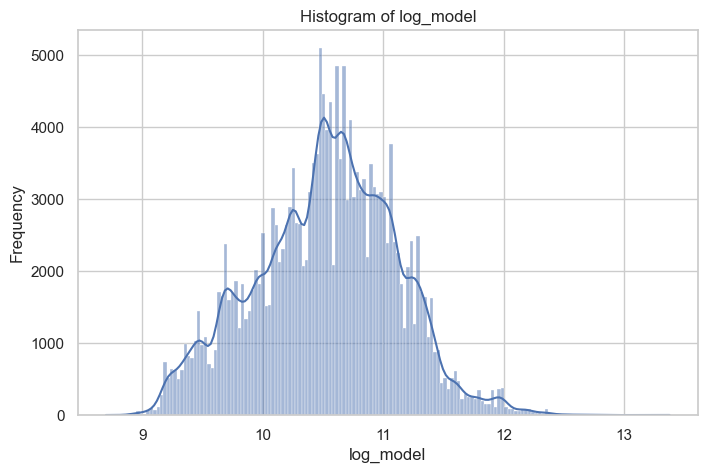

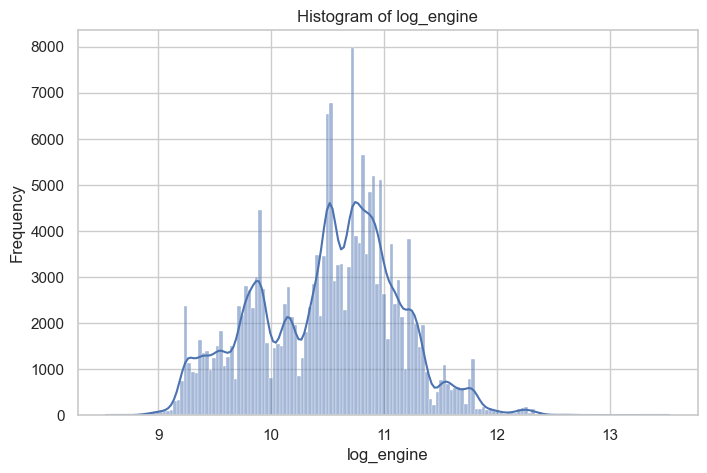

In [20]:
#numerical_features = ['log_price', 'log_milage','vehicle_age']
#numerical_features = ['log_milage','vehicle_age']
encoded_features = ['log_model','log_engine']


# Taking a look at log_milage, vehicle_age after log transformation
for feature in encoded_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(scaled_log_data[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()
    

#### Dropping prescaled vars

In [50]:
post_dropped_data = scaled_log_data.copy()
post_dropped_data.head()

,model,model_year,milage,engine,price,brand_Acura,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,...,int_col_–,accident_At least 1 accident or damage reported,accident_None reported,clean_title_Unknown,clean_title_Yes,log_price,log_milage,log_model,log_engine,vehicle_age
0,12550.511828,2007,213000,11334.659420,4200,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,8.343078,12.269052,9.437596,9.335709,16
1,13879.500000,2002,143250,12452.181818,4999,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,8.517193,11.872354,9.538240,9.429731,21
2,22720.920000,2002,136731,18631.602254,13900,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,9.539716,11.825778,10.031085,9.832668,21
3,48190.662500,2017,19500,42783.955128,45000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,10.714440,9.878221,10.782941,10.663942,6
4,67135.791667,2021,7388,38459.296296,97500,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,11.487618,8.907748,11.114487,10.557382,2


In [51]:
post_dropped_data = post_dropped_data.drop(columns=['milage', 'model_year', 'model', 'engine'])
post_dropped_data.head()

,price,brand_Acura,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,brand_Bentley,brand_Bugatti,brand_Buick,brand_Cadillac,...,int_col_–,accident_At least 1 accident or damage reported,accident_None reported,clean_title_Unknown,clean_title_Yes,log_price,log_milage,log_model,log_engine,vehicle_age
0,4200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,8.343078,12.269052,9.437596,9.335709,16
1,4999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,8.517193,11.872354,9.538240,9.429731,21
2,13900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,9.539716,11.825778,10.031085,9.832668,21
3,45000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,10.714440,9.878221,10.782941,10.663942,6
4,97500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,11.487618,8.907748,11.114487,10.557382,2


In [52]:
preprocessed_train_data = post_dropped_data.copy()
preprocessed_train_data.head()

,price,brand_Acura,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,brand_Bentley,brand_Bugatti,brand_Buick,brand_Cadillac,...,int_col_–,accident_At least 1 accident or damage reported,accident_None reported,clean_title_Unknown,clean_title_Yes,log_price,log_milage,log_model,log_engine,vehicle_age
0,4200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,8.343078,12.269052,9.437596,9.335709,16
1,4999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,8.517193,11.872354,9.538240,9.429731,21
2,13900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,9.539716,11.825778,10.031085,9.832668,21
3,45000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,10.714440,9.878221,10.782941,10.663942,6
4,97500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,11.487618,8.907748,11.114487,10.557382,2


#### Applying Same Transformations to Test Data

In [53]:
# Using final_test_encoded since its already encoded with no missing vals

test_data_processed = final_test_encoded.copy()
test_data_processed.head()

,id,model,model_year,milage,engine,brand_Acura,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,...,int_col_Walnut,int_col_Whisper Beige,int_col_White,int_col_White / Brown,int_col_Yellow,int_col_–,accident_At least 1 accident or damage reported,accident_None reported,clean_title_Unknown,clean_title_Yes
0,188533,19582.380000,2015,98000,20180.156788,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,188534,74242.182266,2020,9142,77416.593849,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,188535,50420.818345,2022,28121,56143.023344,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,188536,28007.062500,2016,61258,47615.796721,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,188537,24723.991489,2018,59000,30597.227679,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


#### Scaling

In [54]:
scaled_test_data = test_data_processed.copy()
scaled_test_data.head()

,id,model,model_year,milage,engine,brand_Acura,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,...,int_col_Walnut,int_col_Whisper Beige,int_col_White,int_col_White / Brown,int_col_Yellow,int_col_–,accident_At least 1 accident or damage reported,accident_None reported,clean_title_Unknown,clean_title_Yes
0,188533,19582.380000,2015,98000,20180.156788,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,188534,74242.182266,2020,9142,77416.593849,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,188535,50420.818345,2022,28121,56143.023344,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,188536,28007.062500,2016,61258,47615.796721,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,188537,24723.991489,2018,59000,30597.227679,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [55]:
scaled_test_data['log_milage'] = np.log1p(scaled_test_data['milage'])
scaled_test_data['log_model'] = np.log1p(scaled_test_data['model'])
scaled_test_data['log_engine'] = np.log1p(scaled_test_data['engine'])


current_year = 2023
scaled_test_data['vehicle_age'] = current_year - scaled_test_data['model_year']
scaled_test_data.head()


,id,model,model_year,milage,engine,brand_Acura,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,...,int_col_Yellow,int_col_–,accident_At least 1 accident or damage reported,accident_None reported,clean_title_Unknown,clean_title_Yes,log_milage,log_model,log_engine,vehicle_age
0,188533,19582.380000,2015,98000,20180.156788,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,11.492733,9.882437,9.912505,8
1,188534,74242.182266,2020,9142,77416.593849,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,9.120744,11.215101,11.256969,3
2,188535,50420.818345,2022,28121,56143.023344,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,10.244307,10.828179,10.935676,1
3,188536,28007.062500,2016,61258,47615.796721,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,11.022866,10.240248,10.770941,7
4,188537,24723.991489,2018,59000,30597.227679,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,10.985310,10.115570,10.328697,5


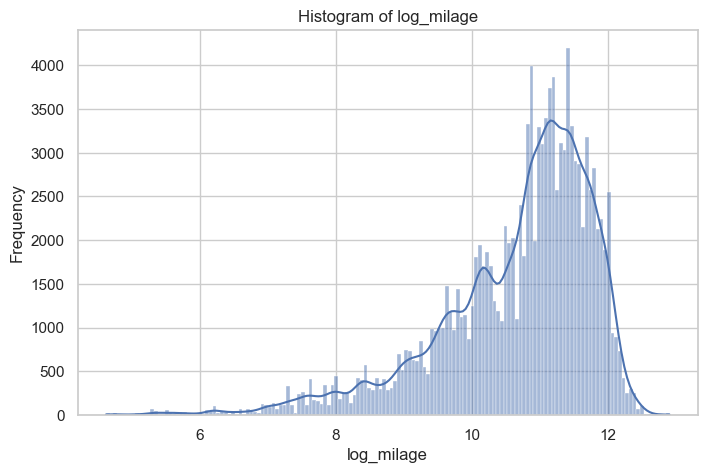

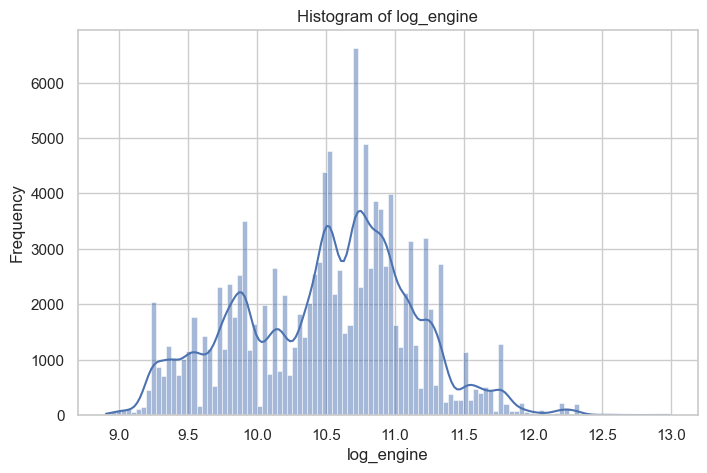

In [56]:
testing = ['log_milage','log_engine']

for feature in testing:
    plt.figure(figsize=(8, 5))
    sns.histplot(scaled_test_data[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [57]:
scaled_test_data = scaled_test_data.drop(columns=['milage', 'model_year', 'model', 'engine'])
scaled_test_data.head()

,id,brand_Acura,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,brand_Bentley,brand_Bugatti,brand_Buick,brand_Cadillac,...,int_col_Yellow,int_col_–,accident_At least 1 accident or damage reported,accident_None reported,clean_title_Unknown,clean_title_Yes,log_milage,log_model,log_engine,vehicle_age
0,188533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,11.492733,9.882437,9.912505,8
1,188534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,9.120744,11.215101,11.256969,3
2,188535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,10.244307,10.828179,10.935676,1
3,188536,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,11.022866,10.240248,10.770941,7
4,188537,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,10.985310,10.115570,10.328697,5


In [58]:
# Find unique features in X_train not in test_data_encoded
unique_to_X_train = set(preprocessed_train_data.columns) - set(scaled_test_data.columns)

# Find unique features in test_data_encoded not in X_train
unique_to_test_data_encoded = set(scaled_test_data.columns) - set(preprocessed_train_data.columns)

# Combine unique features from both sets
unique_features = unique_to_X_train.union(unique_to_test_data_encoded)

print(unique_features)


{'id', 'price', 'log_price'}


In [59]:
preprocessed_test_data = scaled_test_data.copy()
preprocessed_test_data.head()

,id,brand_Acura,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,brand_Bentley,brand_Bugatti,brand_Buick,brand_Cadillac,...,int_col_Yellow,int_col_–,accident_At least 1 accident or damage reported,accident_None reported,clean_title_Unknown,clean_title_Yes,log_milage,log_model,log_engine,vehicle_age
0,188533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,11.492733,9.882437,9.912505,8
1,188534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,9.120744,11.215101,11.256969,3
2,188535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,10.244307,10.828179,10.935676,1
3,188536,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,11.022866,10.240248,10.770941,7
4,188537,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,10.985310,10.115570,10.328697,5


#### Splitting Preprocessed Train Data

In [60]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = preprocessed_train_data.drop(columns=['price','log_price'])    
y = preprocessed_train_data['log_price']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
print(f'Training set shape: {X_train.shape}, Validation set shape: {X_val.shape}')


Training set shape: (150826, 600), Validation set shape: (37707, 600)


In [31]:
X_train.head()

,brand_Acura,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,brand_Bentley,brand_Bugatti,brand_Buick,brand_Cadillac,brand_Chevrolet,...,int_col_Yellow,int_col_–,accident_At least 1 accident or damage reported,accident_None reported,clean_title_Unknown,clean_title_Yes,log_milage,log_model,log_engine,vehicle_age
184031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,11.029650,10.112032,9.975466,6
173831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,12.128117,9.730794,9.496455,20
183819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,11.429555,10.673645,10.585194,3
85525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,8.609590,10.581622,10.866304,0
41872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,8.517393,11.166392,11.155391,0


In [61]:
# Check for missing values in X_train
missing_values_train = X_train.isnull().sum()
print("Missing values in X_train:")
print(missing_values_train[missing_values_train > 0])

# Check for missing values in X_val
missing_values_val = X_val.isnull().sum()
print("Missing values in X_val:")
print(missing_values_val[missing_values_val > 0])


Missing values in X_train:
log_model     6
log_engine    8
dtype: int64
Missing values in X_val:
Series([], dtype: int64)


In [62]:
# Impute missing values in 'model' and 'engine' with the global mean price from training data
X_train['log_model'].fillna(preprocessed_train_data['log_price'].mean(), inplace=True)
X_train['log_engine'].fillna(preprocessed_train_data['log_price'].mean(), inplace=True)

X_val['log_model'].fillna(preprocessed_train_data['log_price'].mean(), inplace=True)
X_val['log_engine'].fillna(preprocessed_train_data['log_price'].mean(), inplace=True)


## Feature Selection

In [44]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on the training set
X_test_scaled = scaler.transform(X_val)  # Only transform the test set

pca = PCA(n_components=0.95)  # Retain 95% of variance or select the number of components
X_train_pca = pca.fit_transform(X_train_scaled)


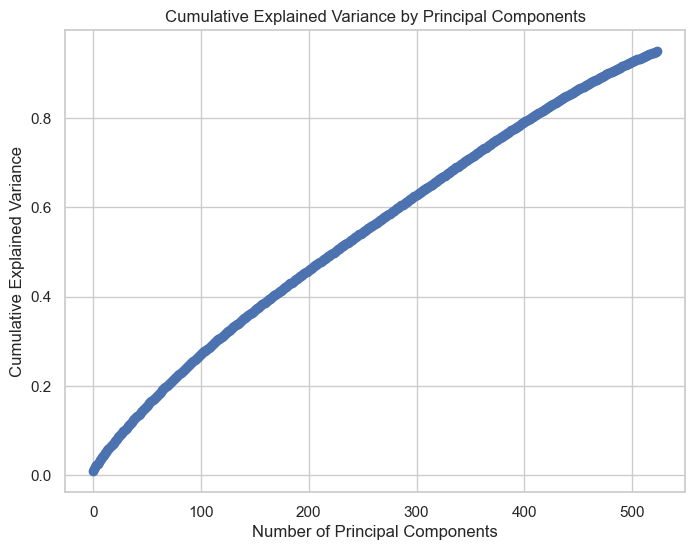

In [45]:
import matplotlib.pyplot as plt

# Explained Variance Plot
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


Top 10 Most Important Feautes (without removing anything)

                                           
- 3                                         milage    0.199385
- 4                                         engine    0.138879
- 0                                             id    0.123912
- 1                                          model    0.091330
- 2                                     model_year    0.064733
- 421                                ext_col_White    0.017590
- 146                                ext_col_Black    0.013863
- 155                                 ext_col_Blue    0.011823
- 89                      transmission_7-Speed A/T    0.010826
- 591                       accident_None reported    0.009978
- 115  transmission_Transmission w/Dual Shift Mode    0.009694
- 245                                 ext_col_Gray    0.009674
- 86                      transmission_6-Speed M/T    0.008134
- 445                                int_col_Beige    0.008113
- 449                                int_col_Black    0.007947
- 380                               ext_col_Silver    0.007655
- 13                               brand_Chevrolet    0.007536
- 97                      transmission_8-Speed A/T    0.007164
- 98                transmission_8-Speed Automatic    0.007044
- 82                      transmission_6-Speed A/T    0.007003

In [39]:
# Dropping the less important features
#top_features = ['milage', 'engine', 'model', 'model_year', 'accident_None reported']

# Update X_train and X_val with the selected features
#X_train_selected = X_train[top_features]
#X_val_selected = X_val[top_features]

## Modeling

#### Linear Regression

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Basic LR model

# Initialize 
lr_model = LinearRegression()

# Train 
lr_model.fit(X_train, y_train)

# Make predictions on the validation set (in log scale)
log_preds = lr_model.predict(X_val)

# Exponentiate the predictions to convert back to the original scale
exp_preds = np.exp(log_preds)

# Calculate RMSE using the original target values (not log-transformed)
rmse_original_scale = np.sqrt(mean_squared_error(np.exp(y_val), exp_preds))  

# Print the RMSE in the original price scale
print(f"RMSE in original price scale: {rmse_original_scale}")

RMSE in original price scale: 69236.24894447043


In [47]:
# Initialize 
lr_model = LinearRegression()

# Train using PCA-transformed data
lr_model.fit(X_train_pca, y_train)

# Transform the validation data using the same PCA transformation applied to training data
X_val_pca = pca.transform(X_test_scaled)

# Make predictions on the PCA-transformed validation set (in log scale)
log_preds = lr_model.predict(X_val_pca)

# Exponentiate the predictions to convert back to the original scale
exp_preds = np.exp(log_preds)

# Calculate RMSE using the original target values (not log-transformed)
rmse_original_scale = np.sqrt(mean_squared_error(np.exp(y_val), exp_preds))  

# Print the RMSE in the original price scale
print(f"RMSE in original price scale: {rmse_original_scale}")


RMSE in original price scale: 69354.99477343124


##### Results Tracker

1. Score with 0 feature selection and no hyperparameter tuning: 78966.42329318252
2. Score with top 5 important features: 78913.3492655269
3. Score with 0 feature selection and hyperparameter tuning (Lasso): 78880.96674924002
4. Score with 0 feature selection, no hyperparameter tuning but correct preprocessing: 69234.6904994329

#### XGBoost

In [75]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize XGBoost model with the best parameters
xgb_model = XGBRegressor(
    n_estimators=450,
    learning_rate=0.05,
    max_depth=10,
    subsample=0.9,
    colsample_bytree=1.0,
    reg_alpha=1,
    reg_lambda=1,
    gamma=0,
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the validation set
log_preds_xgb = xgb_model.predict(X_val)

# Exponentiate the predictions to convert back to the original scale
exp_preds_xgb = np.exp(log_preds_xgb)

# Calculate RMSE in the original price scale
rmse_xgb = np.sqrt(mean_squared_error(np.exp(y_val), exp_preds_xgb))

print(f"XGBoost RMSE in original price scale: {rmse_xgb}")


XGBoost RMSE in original price scale: 68643.94263060794


In [74]:
from xgboost import XGBRegressor #752
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize XGBoost model with the best parameters
xgb_model = XGBRegressor(
    n_estimators=450,
    learning_rate=0.05,
    max_depth=10,
    subsample=0.9,
    colsample_bytree=1.0,
    reg_alpha=0.5,
    reg_lambda=0.5,
    gamma=0,
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the validation set
log_preds_xgb = xgb_model.predict(X_val)

# Exponentiate the predictions to convert back to the original scale
exp_preds_xgb = np.exp(log_preds_xgb)

# Calculate RMSE in the original price scale
rmse_xgb = np.sqrt(mean_squared_error(np.exp(y_val), exp_preds_xgb))

print(f"XGBoost RMSE in original price scale: {rmse_xgb}")


XGBoost RMSE in original price scale: 68691.40094012467


In [60]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [440,445,450,455,460],
    'learning_rate': [0.05],
    'max_depth': [5, 6, 7, 8],
    'subsample': [0.9],
    'colsample_bytree': [1.0],
    'gamma': [0],
    'reg_alpha': [1],
    'reg_lambda': [1]
}

# Initialize the XGBoost model
xgb_model = XGBRegressor(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings sampled
    scoring='neg_root_mean_squared_error',  # Scoring metric
    cv=3,  # Cross-validation splits
    verbose=1,  # Verbosity
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters from the search
best_params = random_search.best_params_
print(f"Best parameters: {best_params}")

# Train the best model with the training data
best_xgb_model = random_search.best_estimator_
best_xgb_model.fit(X_train, y_train)

# Make predictions on the validation set
log_preds_xgb = best_xgb_model.predict(X_val)

# Exponentiate the predictions to convert back to the original scale
exp_preds_xgb = np.exp(log_preds_xgb)

# Calculate RMSE in the original price scale
rmse_xgb = np.sqrt(mean_squared_error(np.exp(y_val), exp_preds_xgb))
print(f"XGBoost RMSE in original price scale: {rmse_xgb}")


c:\Users\dimak\Newfolder\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters: {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 450, 'max_depth': 8, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1.0}
XGBoost RMSE in original price scale: 68726.50735219309


In [81]:
from sklearn.metrics import mean_squared_error
import numpy as np
from xgboost import XGBRegressor

# Parameter values you want to iterate over
depths = [8, 9, 10, 11, 12, 13, 14]

# Other fixed hyperparameters
fixed_params = {
    'n_estimators': 450,
    'learning_rate': 0.05,
    'subsample': 0.9,
    'colsample_bytree': 1.0,
    'gamma': 0,
    'reg_alpha': 1,
    'reg_lambda': 1,
    'random_state': 42
}

# List to store RMSE results for each depth
rmse_results = []

for depth in depths:
    # Update the max_depth for each iteration
    fixed_params['max_depth'] = depth

    # Initialize and fit the XGBoost model
    xgb_model = XGBRegressor(**fixed_params)
    xgb_model.fit(X_train, y_train)

    # Make predictions on the validation set
    log_preds_xgb = xgb_model.predict(X_val)

    # Exponentiate the predictions to convert back to the original scale
    exp_preds_xgb = np.exp(log_preds_xgb)

    # Calculate RMSE in the original price scale
    rmse_xgb = np.sqrt(mean_squared_error(np.exp(y_val), exp_preds_xgb))
    print(f"Max Depth: {depth}, XGBoost RMSE in original price scale: {rmse_xgb}")

    # Append the result to the list
    rmse_results.append((depth, rmse_xgb))

# Optionally, print all RMSE results
for depth, rmse in rmse_results:
    print(f"Max Depth: {depth}, RMSE: {rmse}")


Max Depth: 8, XGBoost RMSE in original price scale: 68726.50735219309
Max Depth: 9, XGBoost RMSE in original price scale: 68688.75758180105
Max Depth: 10, XGBoost RMSE in original price scale: 68662.02302991752
Max Depth: 11, XGBoost RMSE in original price scale: 68672.23291008847
Max Depth: 12, XGBoost RMSE in original price scale: 68633.11249946506
Max Depth: 13, XGBoost RMSE in original price scale: 68660.61034682945
Max Depth: 14, XGBoost RMSE in original price scale: 68603.22385618219
Max Depth: 8, RMSE: 68726.50735219309
Max Depth: 9, RMSE: 68688.75758180105
Max Depth: 10, RMSE: 68662.02302991752
Max Depth: 11, RMSE: 68672.23291008847
Max Depth: 12, RMSE: 68633.11249946506
Max Depth: 13, RMSE: 68660.61034682945
Max Depth: 14, RMSE: 68603.22385618219


1. Fit 3 folds for each of 50 candidates, totalling 150 fits Best parameters: {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1.0} XGBoost RMSE in original price scale: 68741.86293334293

2. Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters: {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 450, 'max_depth': 8, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1.0}
XGBoost RMSE in original price scale: 68726.50735219309

#### Ridge Model

In [ ]:
from sklearn.linear_model import Ridge

# Initialize Ridge model with alpha value (regularization strength)
ridge_model = Ridge(alpha=1.0)

# Train the model
ridge_model.fit(X_train, y_train)

# Make predictions on the validation set
log_preds_ridge = ridge_model.predict(X_val)

# Exponentiate the predictions to convert back to the original scale
exp_preds_ridge = np.exp(log_preds_ridge)

# Calculate RMSE in original price scale
rmse_ridge = np.sqrt(mean_squared_error(np.exp(y_val), exp_preds_ridge))

print(f"Ridge RMSE in original price scale: {rmse_ridge}")


#### Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

# Initialize Lasso model with alpha value (regularization strength)
lasso_model = Lasso(alpha=0.1)

# Train the model
lasso_model.fit(X_train, y_train)

# Make predictions on the validation set
log_preds_lasso = lasso_model.predict(X_val)

# Exponentiate the predictions to convert back to the original scale
exp_preds_lasso = np.exp(log_preds_lasso)

# Calculate RMSE in original price scale
rmse_lasso = np.sqrt(mean_squared_error(np.exp(y_val), exp_preds_lasso))

print(f"Lasso RMSE in original price scale: {rmse_lasso}")


#### ElasticNet Regresson

In [ ]:
from sklearn.linear_model import ElasticNet

# Initialize ElasticNet model with alpha and l1_ratio (mix between L1 and L2 regularization)
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Train the model
elasticnet_model.fit(X_train, y_train)

# Make predictions on the validation set
log_preds_elasticnet = elasticnet_model.predict(X_val)

# Exponentiate the predictions to convert back to the original scale
exp_preds_elasticnet = np.exp(log_preds_elasticnet)

# Calculate RMSE in original price scale
rmse_elasticnet = np.sqrt(mean_squared_error(np.exp(y_val), exp_preds_elasticnet))

print(f"ElasticNet RMSE in original price scale: {rmse_elasticnet}")


#### Random Forest

In [38]:
# Basic RF model

from sklearn.ensemble import RandomForestRegressor

# Initialize
rf_model = RandomForestRegressor(random_state=42)

# Train
rf_model.fit(X_train, y_train)

# Make predictions on the validation set
rf_preds = rf_model.predict(X_val)

# Calculate RMSE
rf_rmse = np.sqrt(mean_squared_error(y_val, rf_preds))

# Exponentiate the predictions to convert back to the original scale
exp_preds = np.exp(rf_preds)

# Calculate RMSE using the original target values (not log-transformed)
rmse_original_scale = np.sqrt(mean_squared_error(np.exp(y_val), exp_preds))  

# Print the RMSE in the original price scale
print(f"RMSE in original price scale: {rmse_original_scale}")

Random Forest RMSE: 1.6618857296737526


1. RMSE in original price scale: 68781.02433869097


In [61]:
# Initialize Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameters grid
rf_params = {
    'n_estimators': [100, 200, 500],            # Number of trees in the forest
    'max_depth': [10, 20, None],                # Maximum depth of each tree
    'min_samples_split': [2, 10, 20],           # Minimum number of samples to split a node
    'min_samples_leaf': [1, 5, 10],             # Minimum number of samples at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']    # Number of features to consider for the best split
}

# Set up GridSearchCV for Random Forest
rf_grid = GridSearchCV(rf_model, rf_params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Train the model with GridSearchCV
rf_grid.fit(X_train, y_train)

# Get the best model from the grid search
rf_best = rf_grid.best_estimator_

# Make predictions on the validation set
rf_preds = rf_best.predict(X_val)

# Calculate RMSE
rf_rmse = np.sqrt(mean_squared_error(y_val, rf_preds))

# Print the RMSE and the best parameters
print(f"Random Forest RMSE: {rf_rmse}")
print(f"Best Random Forest Parameters: {rf_grid.best_params_}")


##### Results Tracker

1. Score with 0 feature selection and no hyperparameter tuning: 80948.23604112217
2. Score with top 5 important features: 82754.79331684638
3. Score with 0 feature selection and hyperparameter tuning: 

#### Decision Tree

In [42]:
from sklearn.tree import DecisionTreeRegressor

# Initialize
dt_model = DecisionTreeRegressor(random_state=42)

# Train
dt_model.fit(X_train, y_train)

# Make predictions on the validation set
dt_preds = dt_model.predict(X_val)

# Calculate RMSE
dt_rmse = np.sqrt(mean_squared_error(y_val, dt_preds))

# Exponentiate the predictions to convert back to the original scale
exp_preds = np.exp(dt_preds)

# Calculate RMSE using the original target values (not log-transformed)
rmse_original_scale = np.sqrt(mean_squared_error(np.exp(y_val), exp_preds))  

# Print the RMSE in the original price scale
print(f"RMSE in original price scale: {rmse_original_scale}")

RMSE in original price scale: 97106.85466754537


##### Results Tracker

1. Score with 0 feature selection and no hyperparameter tuning: 102870.21728554134
2. Score with top 5 important features: 108295.3780680988

#### XGBoost x RF Ensemble

In [63]:
# Initialize XGBoost model with the best parameters
xgb_model = XGBRegressor(
    n_estimators=450,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.9,
    colsample_bytree=1.0,
    reg_alpha=1,
    reg_lambda=1,
    gamma=0,
    random_state=42
)

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Make predictions on the validation set
log_preds_xgb = xgb_model.predict(X_val)

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions on the validation set
rf_preds = rf_model.predict(X_val)

# Ensemble predictions using a simple average
# Exponentiate the log predictions from both models
exp_preds_xgb = np.exp(log_preds_xgb)
exp_preds_rf = np.exp(rf_preds)

# Compute the average of the predictions
ensemble_preds = (exp_preds_xgb + exp_preds_rf) / 2

# Calculate RMSE in the original price scale
rmse_ensemble = np.sqrt(mean_squared_error(np.exp(y_val), ensemble_preds))

# Print the ensemble RMSE
print(f"Ensemble RMSE in original price scale: {rmse_ensemble}")


Ensemble RMSE in original price scale: 68648.1462624009


In [67]:
weight_xgb = 0.6
weight_rf = 0.4
ensemble_preds = (weight_xgb * exp_preds_xgb + weight_rf * exp_preds_rf)
# Calculate RMSE in the original price scale
rmse_ensemble = np.sqrt(mean_squared_error(np.exp(y_val), ensemble_preds))

# Print the ensemble RMSE
print(f"Ensemble RMSE in original price scale: {rmse_ensemble}")

Ensemble RMSE in original price scale: 68646.91426944238


## Submission

In [35]:
test_submission = preprocessed_test_data.copy()
test_submission.head()

,id,brand_Acura,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,brand_Bentley,brand_Bugatti,brand_Buick,brand_Cadillac,...,int_col_Yellow,int_col_–,accident_At least 1 accident or damage reported,accident_None reported,clean_title_Unknown,clean_title_Yes,log_milage,log_model,log_engine,vehicle_age
0,188533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,11.492733,9.882437,9.912505,8
1,188534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,9.120744,11.215101,11.256969,3
2,188535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,10.244307,10.828179,10.935676,1
3,188536,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,11.022866,10.240248,10.770941,7
4,188537,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,10.985310,10.115570,10.328697,5


In [76]:
# Extract features for prediction (exclude 'id' and 'price')
testing = preprocessed_test_data.drop(columns=['price', 'log_price', 'id'], errors='ignore')

# Get the 'id' column
test_ids = test_df['id']

# Make predictions
#test_preds_log = lr_model.predict(testing)
#test_preds = np.exp(test_preds_log)

test_preds_log = xgb_model.predict(testing)
test_preds = np.exp(test_preds_log)

# Create the submission DataFrame
submission = pd.DataFrame({
    'id': test_ids,
    'price': test_preds
})

# Save to CSV
submission.to_csv('submission.csv', index=False) 
print("Submission file created successfully.")


Submission file created successfully.


In [72]:
# Extract features for prediction (exclude 'id' and 'price')
testing = preprocessed_test_data.drop(columns=['price', 'log_price', 'id'], errors='ignore')

# Get the 'id' column
test_ids = test_df['id']

# Make predictions with individual models
# XGBoost predictions
test_preds_log_xgb = xgb_model.predict(testing)
test_preds_xgb = np.exp(test_preds_log_xgb)

# Random Forest predictions
test_preds_log_rf = rf_model.predict(testing)
test_preds_rf = np.exp(test_preds_log_rf)

# Ensemble predictions 
weight_xgb = 0.6
weight_rf = 0.4
test_preds_ensemble = (weight_xgb * test_preds_xgb + weight_rf * test_preds_rf)

# Create the submission DataFrame
submission = pd.DataFrame({
    'id': test_ids,
    'price': test_preds_ensemble
})

# Save to CSV
submission.to_csv('submission.csv', index=False)
print("Submission file created successfully.")


Submission file created successfully.
